# Импорт библиотек

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
import pickle
import datetime as dt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error

# Загрузка данных

In [4]:
df = pd.read_csv('data/df_out.csv')
print(df.shape)
df.head()

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


# Data Preparation

## Data Description

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

## Data Cleaning

### Выявление пропусков

In [6]:
# Количество полностью заполненных объектов и их процент из всей выборки

def full_rows(data):
    print('Количество полностью заполненных объектов:', len(data.dropna()))
    print('Процент полностью заполненных объектов из всей выборки:', 
          round(len(data.dropna()) / len(data) * 100, 2))

full_rows(df)

Количество полностью заполненных объектов: 9507
Процент полностью заполненных объектов из всей выборки: 95.07


In [7]:
# Процент пропущенных значений для каждого признака

missing_values = round(df.isna().sum() / len(df) * 100, 2).sort_values(ascending=False)
missing_values

title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
year              0.36
posting_date      0.02
description       0.02
image_url         0.02
date              0.02
url               0.00
odometer          0.00
manufacturer      0.00
state             0.00
price             0.00
region_url        0.00
region            0.00
price_category    0.00
id                0.00
dtype: float64

In [8]:
# Cписок всех признаков, в которых имеются пропущенные значения

missing_columns = missing_values[missing_values.values > 0].index.tolist()
missing_columns

['title_status',
 'model',
 'long',
 'lat',
 'fuel',
 'transmission',
 'year',
 'posting_date',
 'description',
 'image_url',
 'date']

### Обработка пропусков

#### Обработка пропусков в **дате размещения объявления** о продаже

In [9]:
# Количество значений для даты размещения объявления о продаже

df.posting_date.value_counts(dropna=False).sort_index()

posting_date
2021-04-04T02:32:35-0500    1
2021-04-04T03:40:36-0700    1
2021-04-04T04:20:45-0700    1
2021-04-04T04:20:53-0700    1
2021-04-04T04:40:37-0600    1
                           ..
2021-05-04T21:21:24-0500    1
2021-05-04T21:40:17-0400    1
2021-05-04T21:47:59-0500    1
2021-05-04T22:01:32-0400    1
NaN                         2
Name: count, Length: 9958, dtype: int64

In [10]:
# Описательные статистики даты размещения объявления о продаже

df.posting_date.describe()

count                         9998
unique                        9957
top       2021-04-19T10:00:54-0400
freq                             2
Name: posting_date, dtype: object

In [11]:
# Вывод записей, в которых дата размещения объявления о продаже не заполнена 

df[df.posting_date.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6728,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low,NaN
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium,NaN


In [12]:
# Удаление этих записей

df = df[df.posting_date.notna()]

In [13]:
# Количество пропущенных значений в дате размещения объявления о продаже для обновлённого датафрейма

print("Количество пропущенных значений в posting_date:", df.posting_date.isna().sum())

Количество пропущенных значений в posting_date: 0


#### Обработка пропусков в **коробке передач**

In [14]:
# Количество значений

df.transmission.value_counts(dropna=False)

transmission
automatic    7700
other        1624
manual        631
NaN            43
Name: count, dtype: int64

In [15]:
# Описательные характеристики

df.transmission.describe()

count          9955
unique            3
top       automatic
freq           7700
Name: transmission, dtype: object

In [16]:
# Вывод записей, где значение не заполнено

df[df.transmission.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013.0,lexus,es,gas,109382,clean,NaN,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium,2021-04-11 13:41:58+00:00
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012.0,jeep,wrangler,other,130174,clean,NaN,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium,2021-04-30 18:58:56+00:00
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015.0,honda,civic,gas,79797,clean,NaN,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium,2021-04-16 23:46:55+00:00
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018.0,ram,3500,other,8853,clean,NaN,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high,2021-04-30 14:15:30+00:00
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014.0,jeep,wrangler,gas,110493,clean,NaN,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high,2021-04-30 21:46:04+00:00
1156,7311083008,https://greenville.craigslist.org/ctd/d/greenv...,greenville / upstate,https://greenville.craigslist.org,9998,2013.0,volkswagen,jetta,diesel,96115,clean,NaN,https://images.craigslist.org/00F0F_9oq0KNmZIM...,2013 VOLKSWAGEN JETTA TDI Highline Offered...,sc,34.832550,-82.368350,2021-04-22T17:55:57-0400,medium,2021-04-22 21:55:57+00:00
1349,7303942891,https://wenatchee.craigslist.org/ctd/d/everett...,wenatchee,https://wenatchee.craigslist.org,4995,2005.0,honda,pilot,gas,261591,clean,NaN,https://images.craigslist.org/00S0S_aASnH27HDH...,2005 Honda Pilot EX Offered by: Corn Motor...,wa,47.912956,-122.235725,2021-04-08T16:52:48-0700,low,2021-04-08 23:52:48+00:00
1715,7310344536,https://roanoke.craigslist.org/ctd/d/roanoke-2...,roanoke,https://roanoke.craigslist.org,3995,2007.0,ford,mustang,gas,159342,clean,NaN,https://images.craigslist.org/00J0J_6BuTyEWqNQ...,2007 Ford Mustang V6 Deluxe Coupe Offered ...,va,37.335355,-79.859385,2021-04-21T11:30:46-0400,low,2021-04-21 15:30:46+00:00
1914,7307857568,https://fortmyers.craigslist.org/lee/ctd/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,17000,2012.0,jeep,grand cherokee,gas,116079,clean,NaN,https://images.craigslist.org/00000_gqxck1dkEu...,2012 Jeep Grand Cherokee Limited Offered b...,fl,26.498960,-81.819380,2021-04-16T14:46:41-0400,medium,2021-04-16 18:46:41+00:00
2023,7314592581,https://pueblo.craigslist.org/ctd/d/pueblo-200...,pueblo,https://pueblo.craigslist.org,8494,2004.0,ford,ranger,gas,156969,clean,NaN,https://images.craigslist.org/01212_6ixSUy4WCq...,2004 Ford Ranger Offered by: Discount Moto...,co,38.298339,-104.616024,2021-04-29T17:30:13-0600,low,2021-04-29 23:30:13+00:00


In [17]:
# Заполнение незаполненных значений значением other

df.transmission = df.transmission.fillna('other')

In [18]:
# Количество пропущенных значений в коробке передач для обновлённого датафрейма

print('Количество пропущенных значений в transmission:', df.transmission.isna().sum())

Количество пропущенных значений в transmission: 0


#### Обработка пропусков в **широте и долготе**

In [19]:
# Количество значений

df.lat.value_counts(dropna=False)

lat
NaN          96
43.182400    88
33.779214    79
40.468785    73
33.786500    54
             ..
33.640251     1
39.942263     1
34.299800     1
44.472801     1
42.123900     1
Name: count, Length: 5050, dtype: int64

In [20]:
# Описательные характеристики

df.lat.describe()

count    9902.000000
mean       38.594142
std         5.844895
min       -67.144243
25%        34.830368
50%        39.298522
75%        42.428070
max        64.947500
Name: lat, dtype: float64

In [21]:
# Записи, где не заполнена широта

df[df.lat.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998,2012.0,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26T04:28:35-0400,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995,2014.0,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01T17:49:09-0400,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998,2016.0,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18T04:43:46-0400,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810,2014.0,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19T12:06:28-0400,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900,2008.0,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30T12:09:49-0400,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9154,7312710592,https://athensga.craigslist.org/ctd/d/bmw-x5-a...,athens,https://athensga.craigslist.org,14975,2013.0,bmw,x5,gas,97195,clean,automatic,https://images.craigslist.org/00i0i_kU6D0X9br2...,2013 BMW X5 xDrive35i Sport Activity Navigatio...,ga,NaN,NaN,2021-04-26T07:31:40-0400,medium,2021-04-26 11:31:40+00:00
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998,2018.0,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24T00:54:33-0400,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495,2013.0,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01T20:53:57-0400,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647,2015.0,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18T08:43:25-0400,high,2021-04-18 12:43:25+00:00


In [22]:
# Количество значений для долготы

df.long.value_counts(dropna=False)

long
 NaN          96
-84.112200    88
-84.411811    79
-74.281707    73
-84.445400    54
              ..
-82.527995     1
-97.031100     1
-85.806306     1
-78.625588     1
-79.189500     1
Name: count, Length: 5083, dtype: int64

In [23]:
# Количество значений, в которых не заполнена или широта, или долгота

(df.lat.isna() | df.long.isna()).sum()

96

In [24]:
# Делаем вывод о том, что там, где не запонена широта, не заполнена и долгота

In [25]:
# Обработка пропусков путём удаления записей, в которых не заполнена широта и долгота. Вывод первых пяти записей обновлённого датафрейма

df = df[~(df.lat.isna() | df.long.isna())]
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9902 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              9902 non-null   int64  
 1   url             9902 non-null   object 
 2   region          9902 non-null   object 
 3   region_url      9902 non-null   object 
 4   price           9902 non-null   int64  
 5   year            9868 non-null   float64
 6   manufacturer    9902 non-null   object 
 7   model           9776 non-null   object 
 8   fuel            9841 non-null   object 
 9   odometer        9902 non-null   int64  
 10  title_status    9738 non-null   object 
 11  transmission    9902 non-null   object 
 12  image_url       9902 non-null   object 
 13  description     9902 non-null   object 
 14  state           9902 non-null   object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9902 non-null   object

#### Обработка пропусков в **годе выпуска** автомобиля

In [27]:
# Количество значений

df.year.value_counts(dropna=False).sort_index()

year
1915.0      1
1923.0      1
1927.0      1
1928.0      2
1929.0      3
         ... 
2019.0    587
2020.0    421
2021.0     48
2022.0      3
NaN        34
Name: count, Length: 90, dtype: int64

In [28]:
# Описательные статистики

df.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [29]:
# Записи, где значение не заполнено

df[df.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


In [30]:
# Удаление записей, в которых не заполнен год

df = df[df.year.notna()]

In [31]:
# Количество пропущенных значений после обновления датафрейма

print("Количество пропущенных значений в year:", df.year.isna().sum())

Количество пропущенных значений в year: 0


#### Обработка пропусков в **типе топлива**

In [32]:
# Количество значений

df.fuel.value_counts(dropna=False)

fuel
gas         8298
other        725
diesel       643
hybrid       104
NaN           54
electric      44
Name: count, dtype: int64

In [33]:
# Описательные характеристики

df.fuel.describe()

count     9814
unique       5
top        gas
freq      8298
Name: fuel, dtype: object

In [34]:
# Записи, где значение не заполнено

df[df.fuel.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
32,7309910590,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,4977,2001.0,toyota,camry solara 2dr cpe se v6 auto (natl),NaN,193242,clean,automatic,https://images.craigslist.org/00F0F_ebtJlxCQjv...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-20T10:40:15-0700,low,2021-04-20 17:40:15+00:00
78,7314559074,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,27977,2009.0,ford,"f-150 4wd supercrew 145"" platinum",NaN,79522,clean,automatic,https://images.craigslist.org/00L0L_khoMmqXaSJ...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-04-29T15:15:30-0700,high,2021-04-29 22:15:30+00:00
275,7315141987,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29888,2019.0,nissan,frontier crew cab 4x2 sv auto,NaN,10679,clean,automatic,https://images.craigslist.org/00F0F_d9wEXQuSyu...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T15:50:19-1000,high,2021-05-01 01:50:19+00:00
471,7316807613,https://eugene.craigslist.org/ctd/d/eugene-200...,eugene,https://eugene.craigslist.org,13436,2006.0,chevrolet,"silverado 1500 ext cab 143.5"" wb 4wd ls",NaN,172700,clean,automatic,https://images.craigslist.org/00l0l_35tV0gQdD8...,***Call Us for more information at: 541-228-94...,or,44.076513,-123.150156,2021-05-04T10:20:19-0700,medium,2021-05-04 17:20:19+00:00
1009,7314561306,https://cnj.craigslist.org/ctd/d/parlin-2000-c...,central NJ,https://cnj.craigslist.org,5894,2000.0,chevrolet,"s-10 ext cab 123"" wb ls",NaN,78740,clean,automatic,https://images.craigslist.org/00O0O_8vd70bT1rY...,***Call Us for more information at: 732-316-55...,nj,40.468650,-74.296990,2021-04-29T18:20:19-0400,low,2021-04-29 22:20:19+00:00
1279,7310297136,https://westernmass.craigslist.org/ctd/d/johns...,western massachusetts,https://westernmass.craigslist.org,6000,2008.0,other,IC IC,NaN,0,NaN,automatic,https://images.craigslist.org/00404_cBFpBKbfr2...,"2008 *IC* *IC* CE300 - $6,000Call Us Today! 85...",ma,43.008105,-74.352011,2021-04-21T10:11:05-0400,low,2021-04-21 14:11:05+00:00
1318,7310414739,https://nwct.craigslist.org/ctd/d/melville-200...,northwest CT,https://nwct.craigslist.org,11995,2007.0,gmc,c-7500 multiple uses perfect,NaN,50098,clean,automatic,https://images.craigslist.org/00T0T_jvsOAKSGAr...,2007 *GMC* *C-7500 MULTIPLE USES PERFECT* FOR ...,ct,40.681179,-73.430488,2021-04-21T13:18:41-0400,medium,2021-04-21 17:18:41+00:00
1686,7316342709,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,19942,2017.0,ram,"promaster cargo van 1500 low roof 118"" wb",NaN,88836,clean,automatic,https://images.craigslist.org/00707_6ZlIIpYmGf...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T14:40:24-0400,medium,2021-05-03 18:40:24+00:00
1847,7315151536,https://honolulu.craigslist.org/oah/ctd/d/fort...,hawaii,https://honolulu.craigslist.org,29988,2019.0,toyota,sienna le fwd 8-passenger (natl),NaN,18762,clean,automatic,https://images.craigslist.org/00R0R_dO0gtiRwLa...,***Call Us for more information at: 877-262-34...,hi,21.344376,-157.896975,2021-04-30T16:25:22-1000,high,2021-05-01 02:25:22+00:00


In [35]:
# Заполнение пропусков значением "other"

df.fuel = df.fuel.fillna('other')

In [36]:
# Количество пропущенных значений после обновления датафрейма

print("Количество пропущенных значений в fuel:", df.fuel.isna().sum())

Количество пропущенных значений в fuel: 0


#### Обработка пропусков в **модели** автомобиля

In [37]:
# Количество значений

df.model.value_counts(dropna=False)

model
f-150                        148
NaN                          126
silverado 1500               106
1500                         100
camry                         76
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: count, Length: 3438, dtype: int64

In [38]:
# Описательные статистики

df.model.describe()

count      9742
unique     3437
top       f-150
freq        148
Name: model, dtype: object

In [39]:
# Записи, где значение не заполнено

df[df.model.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
67,7316913641,https://ventura.craigslist.org/cto/d/camarillo...,ventura county,https://ventura.craigslist.org,3000,2005.0,rover,NaN,gas,165206,clean,automatic,https://images.craigslist.org/00S0S_b3yx6L4N2S...,2005 Range Rover HSE Changed Oil and now engi...,ca,34.219565,-119.001986,2021-05-04T13:11:15-0700,low,2021-05-04 20:11:15+00:00
142,7316550853,https://chicago.craigslist.org/chc/cto/d/midlo...,chicago,https://chicago.craigslist.org,3000,2006.0,jeep,NaN,gas,132000,clean,automatic,https://images.craigslist.org/01111_kNv3EKjH4H...,SUPER CLEAN 2006 JEEP LIBEERY RANAGADE 4X4 O...,il,41.618957,-87.726334,2021-05-03T20:33:40-0500,low,2021-05-04 01:33:40+00:00
151,7303575863,https://worcester.craigslist.org/ctd/d/fitchbu...,worcester / central MA,https://worcester.craigslist.org,7800,2007.0,gmc,NaN,gas,190000,clean,automatic,https://images.craigslist.org/00f0f_iWjiToqea2...,2007 gmc with plow leather loaded nice truck r...,ma,42.579600,-71.803100,2021-04-08T09:10:07-0400,low,2021-04-08 13:10:07+00:00
200,7315267860,https://gainesville.craigslist.org/ctd/d/kissi...,gainesville,https://gainesville.craigslist.org,19200,2012.0,ram,NaN,gas,121371,clean,automatic,https://images.craigslist.org/00W0W_hHV4D0Po0G...,2012 RAM 1500 Laramie Crew Cab 2WD Offered...,fl,28.329026,-81.404237,2021-05-01T10:05:17-0400,medium,2021-05-01 14:05:17+00:00
251,7316024407,https://reading.craigslist.org/ctd/d/paterson-...,reading,https://reading.craigslist.org,18695,2007.0,ram,NaN,diesel,220019,clean,automatic,https://images.craigslist.org/00n0n_jgq4eOvH7I...,2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...,pa,40.894535,-74.152367,2021-05-02T21:06:09-0400,medium,2021-05-03 01:06:09+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9564,7314341390,https://desmoines.craigslist.org/cto/d/urbanda...,des moines,https://desmoines.craigslist.org,8000,2007.0,toyota,NaN,gas,85285,clean,automatic,https://images.craigslist.org/00K0K_aMoJgOIueB...,Toyota has been owned by non smoker with no pe...,ia,41.629500,-93.723000,2021-04-29T10:50:54-0500,low,2021-04-29 15:50:54+00:00
9616,7304358131,https://vermont.craigslist.org/ctd/d/salem-201...,vermont,https://vermont.craigslist.org,19944,2012.0,ram,NaN,gas,73082,clean,automatic,https://images.craigslist.org/00A0A_bfCaGJ20IX...,2012 RAM 1500 4WD REGULAR CAB SHORT BED 5.7 HE...,vt,42.788204,-71.233728,2021-04-09T16:24:23-0400,medium,2021-04-09 20:24:23+00:00
9670,7309686008,https://louisville.craigslist.org/cto/d/radcli...,louisville,https://louisville.craigslist.org,1600,2005.0,gmc,NaN,gas,52536,clean,automatic,https://images.craigslist.org/01111_99unV6cYER...,GMC Savana PRO AWD cargo van has been driven l...,ky,37.858900,-86.006900,2021-04-20T04:48:30-0400,low,2021-04-20 08:48:30+00:00
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000,2017.0,rover,NaN,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03T16:37:36-0500,high,2021-05-03 21:37:36+00:00


In [40]:
# Заполнение пропусков значением "other"

df.model = df.model.fillna('other')

In [41]:
# Количество пропущенных значений после обновления датафрейма

print("Количество пропущенных значений в model:", df.model.isna().sum())

Количество пропущенных значений в model: 0


#### Обработка пропусков в **статусе** автомобиля

In [42]:
# Количество значений

df.title_status.value_counts(dropna=False)

title_status
clean         9397
rebuilt        168
NaN            159
salvage         91
lien            35
missing         16
parts only       2
Name: count, dtype: int64

In [43]:
# Описательные статистики

df.title_status.describe()

count      9709
unique        6
top       clean
freq       9397
Name: title_status, dtype: object

In [44]:
# Записи, где значение не заполнено

df[df.title_status.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
187,7313570594,https://orangecounty.craigslist.org/ctd/d/coro...,orange county,https://orangecounty.craigslist.org,17900,2013.0,ram,1500 tradesman quad cab,gas,145499,NaN,automatic,https://images.craigslist.org/00H0H_1JFMPCYyW8...,2013 Ram 1500 Tradesman Quad Cab PRICED TO SEL...,ca,33.873436,-117.542806,2021-04-27T15:03:47-0700,medium,2021-04-27 22:03:47+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
286,7306702976,https://toledo.craigslist.org/ctd/d/chelsea-73...,toledo,https://toledo.craigslist.org,4592,2003.0,chevrolet,avalanche 1500,gas,268691,NaN,automatic,https://images.craigslist.org/00808_1IOMJuA4GL...,$73/mo - 2003 Chevrolet Avalanche 1500 BaseCre...,oh,42.300673,-84.024108,2021-04-14T12:03:01-0400,low,2021-04-14 16:03:01+00:00
312,7307609203,https://roseburg.craigslist.org/ctd/d/eugene-2...,roseburg,https://roseburg.craigslist.org,18450,2017.0,ford,mustang,gas,66049,NaN,automatic,https://images.craigslist.org/00505_4apF36sLbP...,"2017 Ford MUSTANG - $18,450 \tMayberry Motors ...",or,44.058499,-123.106176,2021-04-16T04:06:29-0700,medium,2021-04-16 11:06:29+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9740,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,other,95674,NaN,other,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9840,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00
9856,7309717260,https://savannah.craigslist.org/ctd/d/jacksonv...,savannah / hinesville,https://savannah.craigslist.org,11495,2006.0,lexus,gx 470,gas,242000,NaN,automatic,https://images.craigslist.org/00s0s_8xg4gw6aAg...,"2006 *Lexus* *GX 470* 4dr SUV 4WD - $11,495By ...",ga,30.513566,-81.621875,2021-04-20T08:01:49-0400,medium,2021-04-20 12:01:49+00:00


In [45]:
# Заполнение пропусков самым популярным значением

df.title_status = df.title_status.fillna(df.title_status.mode().tolist()[0])

In [46]:
# Количество пропущенных значений после обновления датафрейма

print("Количество пропущенных значений в title_status:", df.title_status.isna().sum())

Количество пропущенных значений в title_status: 0


### Преобразование типов данных

In [47]:
# Для года выпуска
df.year = df.year.astype(int)
df.year.dtype

dtype('int64')

In [48]:
# Для типа топлива
df.fuel.dtype

dtype('O')

In [49]:
df.fuel = df.fuel.astype('category')
df.fuel.dtype

CategoricalDtype(categories=['diesel', 'electric', 'gas', 'hybrid', 'other'], ordered=False, categories_dtype=object)

### Аномалии и выбросы

#### Выбросы в годе выпуска

In [50]:
# Описательные характеристики
df.year.describe()

count    9868.000000
mean     2010.909708
std         9.705988
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

In [51]:
# Поиск границ для нормальных значений года выпуска, используя интерквартильный размах

def outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

boundaries = outliers(df.year)

print('Минимальная граница при использовании интерквартильного размаха:', boundaries[0])
print('Максимальная граница при использовании интерквартильного размаха:', boundaries[1])

Минимальная граница при использовании интерквартильного размаха: 1994.5
Максимальная граница при использовании интерквартильного размаха: 2030.5


In [52]:
# Подсчёт количества выбросов

is_outlier_year = (df.year < boundaries[0]) | (df.year > boundaries[1])
print('Количество выбросов в годе выпуска автомобиля:', is_outlier_year.sum())

Количество выбросов в годе выпуска автомобиля: 394


In [53]:
# Доля выбросов

print('Доля выбросов в годе выпуска автомобиля:', round(is_outlier_year.sum() / len(df) * 100, 2))

Доля выбросов в годе выпуска автомобиля: 3.99


In [54]:
# Количество значений для категории цены для записей, в которых год выпуска автомобиля является выбросом

df[is_outlier_year].price_category.value_counts()

price_category
low       181
medium    135
high       78
Name: count, dtype: int64

In [55]:
# Выбросы в годе выпуска находятся среди минимальных значений
# Заполнение выбросов значением нижней границы

df.loc[df.year < boundaries[0], 'year'] = int(boundaries[0])

In [56]:
# Проверка, что значения не выходят за границы

df.year.describe()

count    9868.000000
mean     2011.658391
std         6.530991
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

#### Аномалии в стоимости

Text(0.5, 1.0, 'Распределение стоимости автомобиля')

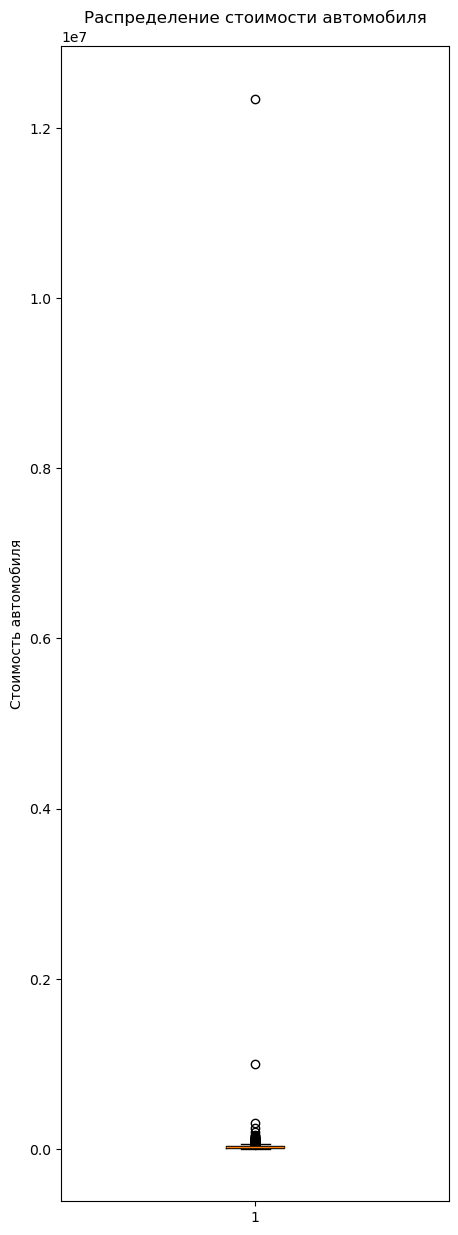

In [57]:
# «Ящик с усами» для стоимости автобомиля

plt.figure(figsize=(5, 15))
plt.boxplot(df.price);
plt.ylabel('Стоимость автомобиля')
plt.title('Распределение стоимости автомобиля')

In [58]:
# Описательные статистики стоимости автомобиля для значений "ящика"

df.price.describe().apply(lambda x: f"{x:0.3f}")

count        9868.000
mean        20602.005
std        125437.186
min           500.000
25%          7800.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

In [59]:
# Вывод границ для нормальных значений стоимости автомобиля, используя интерквартильный размах

boundaries_1 = outliers(df.price)

print('Минимальная граница:', boundaries_1[0])
print('Максимальная граница:', boundaries_1[1])

Минимальная граница: -22485.0
Максимальная граница: 58275.0


In [60]:
# Количество выбросов в стоимости автомобиля

is_outlier_price = (df.price < boundaries_1[0]) | (df.price > boundaries_1[1])
print('Количество выбросов в стоимости автомобиля:', is_outlier_price.sum())

Количество выбросов в стоимости автомобиля: 207


In [61]:
# Удаление аномальных значений из датафрейма

df = df[~is_outlier_price]

### Оценка датафрейма после прохождения этапа

In [62]:
full_rows(df)

Количество полностью заполненных объектов: 9661
Процент полностью заполненных объектов из всей выборки: 100.0


In [63]:
df.shape

(9661, 20)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9661 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              9661 non-null   int64   
 1   url             9661 non-null   object  
 2   region          9661 non-null   object  
 3   region_url      9661 non-null   object  
 4   price           9661 non-null   int64   
 5   year            9661 non-null   int64   
 6   manufacturer    9661 non-null   object  
 7   model           9661 non-null   object  
 8   fuel            9661 non-null   category
 9   odometer        9661 non-null   int64   
 10  title_status    9661 non-null   object  
 11  transmission    9661 non-null   object  
 12  image_url       9661 non-null   object  
 13  description     9661 non-null   object  
 14  state           9661 non-null   object  
 15  lat             9661 non-null   float64 
 16  long            9661 non-null   float64 
 17  posting_date    966

## Feature Selection

### Исследование зависимости стоимости автомобиля от года производства

Text(0.5, 1.0, 'Зависимость стоимости автомобиля от года выпуска')

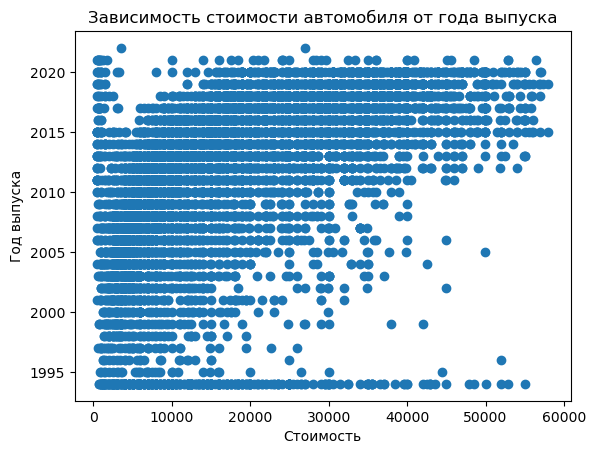

In [65]:
# Диаграмма рассеяния для визуализации зависимости стоимости от года выпуска автомобиля

plt.scatter(df['price'], df['year']);
plt.xlabel('Стоимость')
plt.ylabel('Год выпуска')
plt.title('Зависимость стоимости автомобиля от года выпуска')

In [66]:
# Из графика можно сделать вывод о возрастающем тренде: чем новее автомобиль, тем выше его цена
# Исключение составляют наиболее старые и самые новые автомобили

In [67]:
# Количество автомобилей, произведенных в каждый год

stats_year_quantity = df.groupby(['year'], as_index=False)[['id']].count()
stats_year_quantity = stats_year_quantity.rename(columns={'id': 'auto_quantity'})
stats_year_quantity

,year,auto_quantity
0,1994,386
1,1995,33
2,1996,25
3,1997,44
4,1998,55
5,1999,81
6,2000,78
7,2001,122
8,2002,149
9,2003,185


In [68]:
# Исключение из исследования автомобилей, произведённых в последние два года (мало накопленной информации)

df = df[df['year'] < 2021]

In [69]:
# Статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год

stats_year_price = df.groupby(['year'], as_index=False).agg({'price': 'mean'})
stats_year_price = stats_year_price.rename(columns={'price': 'price_mean'})
stats_year_price

,year,price_mean
0,1994,13528.049223
1,1995,9610.060606
2,1996,9362.960000
3,1997,6441.250000
4,1998,6528.672727
5,1999,7446.641975
6,2000,7614.410256
7,2001,7852.090164
8,2002,7173.798658
9,2003,7767.962162


Text(0.5, 1.0, 'Зависимость средней стоимости автомобиля от года выпуска')

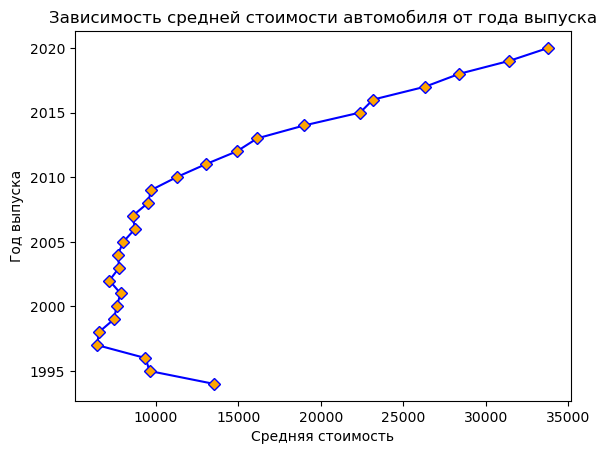

In [70]:
# Линейный график для визуализации зависимости стоимости от года выпуска автомобиля

plt.plot(stats_year_price['price_mean'], stats_year_price['year'], color='blue', marker='D', markerfacecolor='orange');
plt.xlabel('Средняя стоимость')
plt.ylabel('Год выпуска')
plt.title('Зависимость средней стоимости автомобиля от года выпуска')

In [71]:
# Подсчёт коэффициента корреляции Пирсона для стоимости автомобиля и года его производства

correlation = stats_year_price['price_mean'].corr(stats_year_price['year'])
print('Коэффициент корреляции Пирсона для стоимости автомобиля и года его производства:', correlation)

Коэффициент корреляции Пирсона для стоимости автомобиля и года его производства: 0.8237461165731321


Text(0.5, 1.0, 'Распределение стоимости автомобиля')

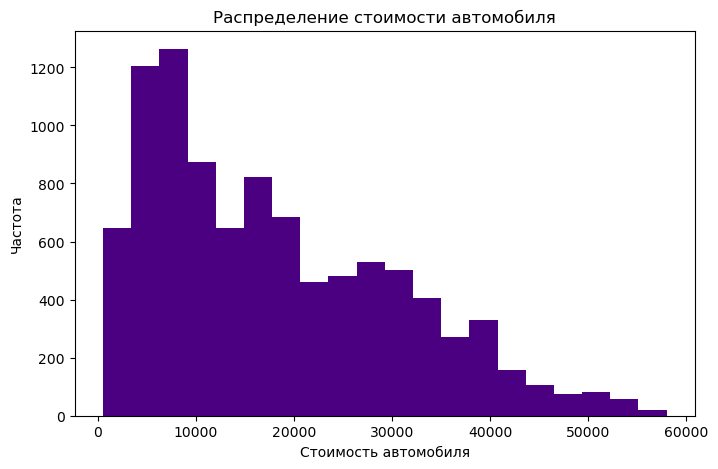

In [72]:
# Гистограмма распределения стоимости автомобиля

plt.figure(figsize=(8, 5))
plt.hist(df.price, bins=20, color='indigo');
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля')

### Исследование зависимости ценовой категории автомобилиля от стоимости и года производства

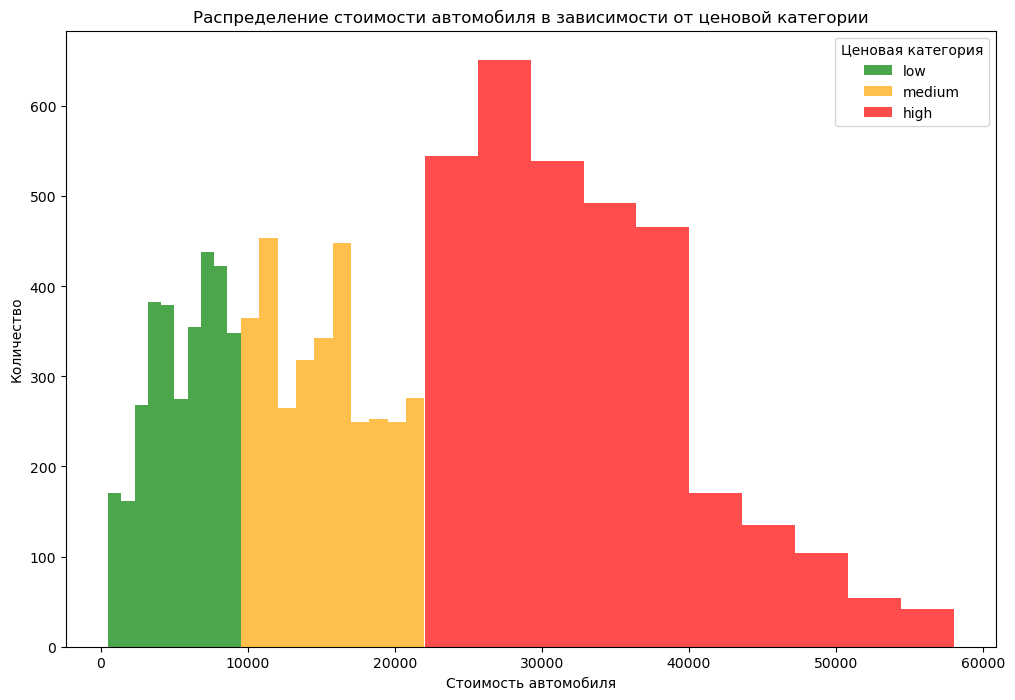

In [73]:
# Графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля

colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.hist(data['price'], color=color, alpha=0.7)
    
plt.ylabel('Количество')
plt.xlabel('Стоимость автомобиля')
plt.title('Распределение стоимости автомобиля в зависимости от ценовой категории')
plt.legend(colors, title="Ценовая категория");

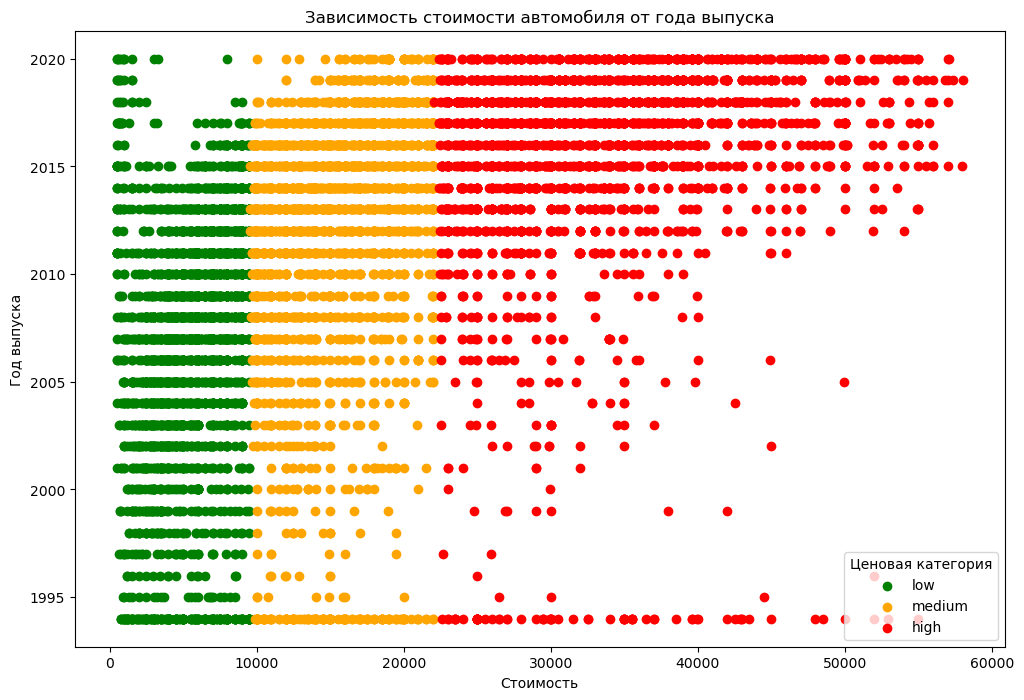

In [74]:
# Диаграмма рассеяния для стоимости автомобиля и его года выпуска

colors = {'low': 'green', 'medium': 'orange', 'high': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.scatter(data['price'], data['year'], c=color, label=price_category)

ax.legend(loc='lower right', title='Ценовая категория')
plt.title('Зависимость стоимости автомобиля от года выпуска')
plt.xlabel('Стоимость')
plt.ylabel('Год выпуска')
plt.show()

# Feature Engineering

## Генерация дополнительных признаков

In [75]:
# Создание копии датафрейма, чтобы сохранить результаты предыдущего этапа
df1 = df.copy()

In [76]:
df1.shape

(9619, 20)

#### Признаки на основе дат

In [77]:
df1[['posting_date', 'date']]

,posting_date,date
0,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00
1,2021-05-03T15:40:21-0400,2021-05-03 19:40:21+00:00
2,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00
3,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00
5,2021-04-08T15:10:56-0400,2021-04-08 19:10:56+00:00
...,...,...
9995,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00
9996,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00
9997,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00
9998,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00


In [78]:
df1['date'] = pd.to_datetime(df1.date, utc=True)
df1['date']

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
5      2021-04-08 19:10:56+00:00
                  ...           
9995   2021-04-10 20:33:57+00:00
9996   2021-05-03 13:36:30+00:00
9997   2021-04-22 19:14:01+00:00
9998   2021-04-14 14:14:42+00:00
9999   2021-04-24 17:50:49+00:00
Name: date, Length: 9619, dtype: datetime64[ns, UTC]

In [79]:
df1['month'] = df1.date.dt.month
df1['month']

0       4
1       5
2       4
3       4
5       4
       ..
9995    4
9996    5
9997    4
9998    4
9999    4
Name: month, Length: 9619, dtype: int32

In [80]:
df1['dayofweek'] = df1.date.dt.weekday
df1['dayofweek']

0       5
1       0
2       2
3       5
5       3
       ..
9995    5
9996    0
9997    3
9998    2
9999    5
Name: dayofweek, Length: 9619, dtype: int32

In [81]:
diff_years = df1.date.dt.year - df1.year
df1['diff_years'] = diff_years
df1['diff_years']

0        1
1        5
2        4
3        8
5        9
        ..
9995    19
9996    13
9997    10
9998     6
9999     4
Name: diff_years, Length: 9619, dtype: int64

#### Признак is_manufacturer

In [82]:
manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    df1[f'is_{manufacturer}'] = df1.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis=1)

In [83]:
df1.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,month,dayofweek,diff_years,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,4,5,1,0,0,0,0,0,0,0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,5,0,5,0,1,0,0,0,0,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,4,2,4,0,0,0,0,0,0,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,4,5,8,0,0,0,1,0,0,0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,4,3,9,0,0,0,0,0,0,0


#### Признак age_category

In [84]:
df1['age_category'] = df1.apply(lambda x: 'new' if x.year > 2013 else 'old' if x.year < 2006 else 'average', axis=1)

df1[['year', 'age_category']]

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,average
5,2012,average
...,...,...
9995,2002,old
9996,2008,average
9997,2011,average
9998,2015,new


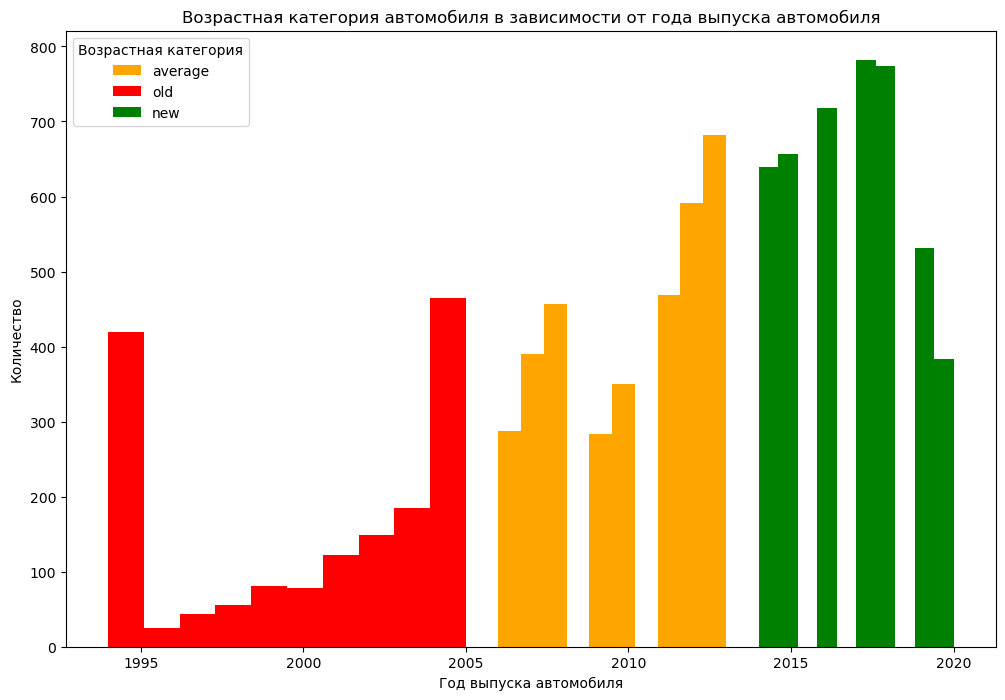

In [85]:
# Графики распределения года производства автомобиля для каждой из возрастной категории автомобиля

colors = {'average': 'orange', 'old': 'red', 'new': 'green'}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df1[df1['age_category'] == age_category]

    ax.hist(data['year'], color=color)

plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Возрастная категория автомобиля в зависимости от года выпуска автомобиля')
plt.legend(colors, title="Возрастная категория");

#### Признак model_len и model_word_count

In [86]:
df1['model_len'] = df1.apply(lambda x: len(x.model), axis=1)
df1['model_len']

0       22
1       20
2       16
3        4
5       22
        ..
9995     4
9996     8
9997    25
9998     7
9999    22
Name: model_len, Length: 9619, dtype: int64

In [87]:
df1['model_word_count'] = df1.model.apply(lambda x: len(x.split(' ')))
df1['model_word_count']

0       5
1       4
2       3
3       1
5       5
       ..
9995    1
9996    1
9997    5
9998    1
9999    5
Name: model_word_count, Length: 9619, dtype: int64

#### Признак short_model

In [88]:
df1.model.unique().tolist()

['2500 crew cab big horn',
 'explorer 4wd 4dr xlt',
 'golf r hatchback',
 'rav4',
 '1 series 128i coupe 2d',
 'fusion se',
 'accord',
 'charger',
 'altima',
 'galant',
 '500 pop',
 'town car',
 'e-series van universal by glaval designer luxury series conversion leather 16" dvd limo lighting bed',
 'g. caravan se',
 'silverado 2500hd 4x4',
 'mustang',
 'maxima sv',
 'civic',
 'explorer',
 'vue v6',
 'tahoe',
 'f-350',
 'f150',
 'clubman',
 'xts sedan 4d',
 '3500',
 '2500 4x4',
 'rogue',
 'silverado 1500',
 'compass 4x4',
 'camry solara 2dr cpe se v6 auto (natl)',
 'silverado',
 'renegade',
 'forte5',
 'f-150',
 'wrangler unlimited all new',
 'mazda3 touring sedan 4d',
 '535i',
 'park avenue',
 'focus',
 'camry',
 'gx',
 'f150 lariat',
 'titan',
 'corolla',
 'colorado extended cab',
 'tiguan 2.0t s',
 'impreza',
 'jetta s',
 'super duty f-250 srw',
 'altima 2.5 s',
 'q5',
 'es 350 f sport sedan 4d',
 'lx450',
 'pilot',
 'Diahatsu',
 'other',
 'sequoia',
 '1500 classic',
 'tucson se awd',

In [89]:
df1['short_model'] = df1.model.str.split(' ').str[0]
print('Количество получившихся уникальных значений модели автомобиля:', df1['short_model'].nunique())

Количество получившихся уникальных значений модели автомобиля: 943


#### Признаки desc_len, model_in_desc

In [90]:
df1['desc_len'] = df1.apply(lambda x: len(x.description), axis=1)

In [91]:
df1['model_in_desc'] = df1.apply(lambda x: x.description.count(x.model) , axis=1)

## Преобразование категориальных переменных

In [92]:
# Создание датафрейма, содержащего только категориальные переменные

data_category = df1[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category', 'fuel']]
data_category

,short_model,transmission,region,manufacturer,state,title_status,age_category,fuel
0,2500,other,chattanooga,ram,tn,clean,new,diesel
1,explorer,automatic,north jersey,ford,nj,clean,new,other
2,golf,other,reno / tahoe,volkswagen,ca,clean,new,gas
3,rav4,automatic,fayetteville,toyota,nc,clean,average,gas
5,1,other,knoxville,bmw,tn,clean,average,other
...,...,...,...,...,...,...,...,...
9995,rav4,automatic,chautauqua,toyota,ny,clean,old,gas
9996,wrangler,other,binghamton,jeep,ny,clean,average,gas
9997,a3,automatic,salem,audi,or,clean,average,gas
9998,cayenne,automatic,madison,porsche,wi,clean,new,hybrid


In [93]:
ohe = OneHotEncoder(sparse_output=False)

In [94]:
ohe.fit(data_category)

OneHotEncoder(sparse_output=False)

In [95]:
ohe_data_category = ohe.transform(data_category)
print(ohe_data_category)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [96]:
ohe_data_category.shape

(9619, 1444)

In [97]:
ohe.get_feature_names_out()

array(['short_model_-benz', 'short_model_1', 'short_model_124', ...,
       'fuel_gas', 'fuel_hybrid', 'fuel_other'], dtype=object)

In [98]:
# Создание отдельного датафрейма из ohe_data, чтобы потом присоединить его к исходному

df_for_ohe = pd.DataFrame(ohe_data_category, columns=ohe.get_feature_names_out().tolist())
df_for_ohe

,short_model_-benz,short_model_1,short_model_124,short_model_128i,short_model_135i,short_model_1500,short_model_163869,short_model_1928,short_model_1951,short_model_1954,...,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [99]:
# Сброс индексов у начального датафрейма перед объединением (concat)

df1 = df1.reset_index(drop=True)

In [100]:
# Объединение начального датафрейма и датафрейма с преобразованными категориальными переменными

df1 = pd.concat([df1, df_for_ohe], axis=1)

In [101]:
df1.shape

(9619, 1480)

## Стандартизация данных

In [102]:
data_std = df1[['lat', 'long', 'year', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count', 'month', 'dayofweek', 'diff_years', 'odometer']]
data_std

,lat,long,year,desc_len,model_in_desc,model_len,model_word_count,month,dayofweek,diff_years,odometer
0,35.060000,-85.250000,2020,4482,0,22,5,4,5,1,27442
1,40.821805,-74.061962,2016,968,0,20,4,5,0,5,60023
2,33.779214,-84.411811,2017,4286,0,16,3,4,2,4,14048
3,35.715954,-78.655304,2013,3241,0,4,1,4,5,8,117291
4,35.970000,-83.940000,2012,4851,0,22,5,4,3,9,80465
...,...,...,...,...,...,...,...,...,...,...,...
9614,42.123900,-79.189500,2002,1710,0,4,1,4,5,19,150000
9615,43.216990,-77.755610,2008,948,0,8,1,5,0,13,113573
9616,44.925908,-122.982753,2011,909,0,25,5,4,3,10,150184
9617,43.029559,-89.397796,2015,3644,0,7,1,4,2,6,61943


In [103]:
std_scaler = StandardScaler()

In [104]:
std_scaler.fit(data_std)

StandardScaler()

In [105]:
std_scaler_data_std = std_scaler.transform(data_std)
print(std_scaler_data_std)
print(std_scaler_data_std.shape)

[[-0.61917248  0.48424452  1.30694639 ...  1.12028423 -1.30694639
  -1.07955492]
 [ 0.38801429  1.11079989  0.69077105 ... -1.37497211 -0.69077105
  -0.56016511]
 [-0.84305905  0.531185    0.84481489 ... -0.37686957 -0.84481489
  -1.29307529]
 ...
 [ 1.10542805 -1.62887477 -0.07944812 ...  0.1221817   0.07944812
   0.87713591]
 [ 0.7739386   0.25195859  0.53672722 ... -0.37686957 -0.53672722
  -0.52955744]
 [-0.33773799  0.98546471  0.84481489 ...  1.12028423 -0.84481489
  -0.944387  ]]
(9619, 11)


In [106]:
# Создание новых наименований признаков

column_names = ['lat', 'long', 'year', 'desc_len', 'model_in_desc', 'model_len', 'model_word_count', 'month', 'dayofweek', 'diff_years', 'odometer']
column_names_new = []

for name in column_names:
    column_names_new.append(name + '_std')

column_names_new

['lat_std',
 'long_std',
 'year_std',
 'desc_len_std',
 'model_in_desc_std',
 'model_len_std',
 'model_word_count_std',
 'month_std',
 'dayofweek_std',
 'diff_years_std',
 'odometer_std']

In [107]:
# Создание отдельного датафрейма из data_std, чтобы потом присоединить его к исходному

df_std = pd.DataFrame(std_scaler_data_std, columns = column_names_new)
df_std

,lat_std,long_std,year_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std,odometer_std
0,-0.619172,0.484245,1.306946,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.306946,-1.079555
1,0.388014,1.110800,0.690771,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.690771,-0.560165
2,-0.843059,0.531185,0.844815,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.844815,-1.293075
3,-0.504509,0.853562,0.228640,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.228640,0.352772
4,-0.460101,0.557607,0.074596,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.074596,-0.234289
...,...,...,...,...,...,...,...,...,...,...,...
9614,0.615626,0.823646,-1.465843,-0.376744,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,1.465843,0.874203
9615,0.806702,0.903947,-0.541580,-0.654060,-0.155788,-0.453583,-0.788810,1.623784,-1.374972,0.541580,0.293502
9616,1.105428,-1.628875,-0.079448,-0.668253,-0.155788,1.509450,1.910669,-0.615846,0.122182,0.079448,0.877136
9617,0.773939,0.251959,0.536727,0.327100,-0.155788,-0.569055,-0.788810,-0.615846,-0.376870,-0.536727,-0.529557


In [108]:
df1 = pd.concat([df1, df_std], axis=1)

In [109]:
df1.shape

(9619, 1491)

## Очистка датафрейма от лишних признаков для следующего этапа

In [110]:
columns_for_drop = ['year', 'url', 'region', 'price', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 
                    'desc_len', 'model_in_desc', 'age_category', 'model_len', 'model_word_count', 
                    'short_model', 'date', 'month', 'dayofweek', 'diff_years']

df_prepared = df1.drop(columns = columns_for_drop)

df_prepared.head()

,id,price_category,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan,short_model_-benz,...,long_std,year_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std,odometer_std
0,7308295377,high,0,0,0,0,0,0,0,0.0,...,0.484245,1.306946,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.306946,-1.079555
1,7316380095,medium,0,1,0,0,0,0,0,0.0,...,1.110800,0.690771,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.690771,-0.560165
2,7313733749,high,0,0,0,0,0,0,0,0.0,...,0.531185,0.844815,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.844815,-1.293075
3,7308210929,medium,0,0,0,1,0,0,0,0.0,...,0.853562,0.228640,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.228640,0.352772
4,7303797340,medium,0,0,0,0,0,0,0,0.0,...,0.557607,0.074596,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.074596,-0.234289


# Modelling

## Подготовка данных

In [111]:
# Создание копии датафрейма, чтобы сохранить результаты предыдущего этапа
df2 = df_prepared.copy()

In [112]:
# Удаление колонки id 

df2 = df2.drop(['id'], axis=1)

In [113]:
df2.shape

(9619, 1463)

In [114]:
x = df2.drop(['price_category'], axis=1)
y = df2['price_category']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Модели обучения

### Случайный лес

#### Объявление модели и проверка качества

In [124]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [125]:
pred_train = rf_clf.predict(x_train)

In [126]:
accuracy_score(y_train, pred_train)

1.0

In [127]:
pred_test = rf_clf.predict(x_test)

In [128]:
accuracy_score(y_test, pred_test)

0.7577962577962578

#### Тюнинг модели

In [129]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [130]:
param_grid = {
   'n_estimators': list(range(100, 501, 100)),
   'max_features': ['sqrt', 'log2'],
   'min_samples_leaf': list(range(1, 10))
}

In [131]:
grid_search_rf = GridSearchCV(
   estimator = rf_clf,
   param_grid = param_grid,
   scoring = 'accuracy',
   verbose = 1,
   n_jobs = -1
)

In [132]:
grid_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [133]:
best_params = grid_search_rf.best_params_
best_params

{'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}

In [134]:
rf_clf_tuned = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=500)
rf_clf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=500)

In [192]:
pred_train_tuned = rf_clf_tuned.predict(x_train)

In [193]:
accuracy_score(y_train, pred_train_tuned)

1.0

In [135]:
pred_test_tuned = rf_clf_tuned.predict(x_test)

In [136]:
accuracy_score(y_test, pred_test_tuned)

0.7626472626472627

#### Проверка модели с помощью кросс-валидации на тренировочной выборке

In [145]:
cv_score_rf = cross_val_score(rf_clf_tuned, x_train, y_train, cv=5)

In [168]:
cv_score_rf.mean(), cv_score_rf.std()

(0.7628089938457703, 0.0122155406327725)

### Логистическая регрессия

#### Объявление модели и проверка качества

In [116]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [117]:
pred_logreg_train = logreg.predict(x_train)

In [118]:
accuracy_score(y_train, pred_logreg_train)

0.8557849398485073

In [153]:
pred_logreg_test = logreg.predict(x_test)

In [154]:
accuracy_score(y_test, pred_logreg_test)

0.7543312543312544

In [119]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### Проверка модели с помощью кросс-валидации на тренировочной выборке

In [147]:
cv_score_logreg = cross_val_score(logreg, x_train, y_train, cv=5)

In [167]:
cv_score_logreg.mean(), cv_score_logreg.std()

(0.7657783352141295, 0.02116260901967047)

### Многослойный персептрон

#### Объявление модели и проверка качества

In [149]:
mlp = MLPClassifier(random_state=42, max_iter=500)

In [150]:
mlp.fit(x_train, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [151]:
pred_mlp_train = mlp.predict(x_train)

In [152]:
accuracy_score(y_train, pred_mlp_train)

1.0

In [155]:
pred_mlp_test = mlp.predict(x_test)

In [180]:
accuracy_score(y_test, pred_mlp_test)

0.7588357588357588

#### Тюнинг модели

In [157]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [158]:
mlp_tuned = MLPClassifier(random_state=42, max_iter=500, hidden_layer_sizes=(100,20), activation = 'tanh')
mlp_tuned.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 20), max_iter=500,
              random_state=42)

In [159]:
pred_mlp_tuned_train = mlp_tuned.predict(x_train)

In [160]:
accuracy_score(y_train, pred_mlp_tuned_train)

0.9998514777959305

In [161]:
pred_mlp_tuned_test = mlp_tuned.predict(x_test)

In [179]:
accuracy_score(y_test, pred_mlp_tuned_test)

0.7761607761607762

#### Проверка модели с помощью кросс-валидации на тренировочной выборке

In [165]:
cv_score_mlp = cross_val_score(mlp_tuned, x_train, y_train, cv=5)

In [166]:
cv_score_mlp.mean(), cv_score_mlp.std()

(0.774690220191036, 0.014195120009600857)

## Выбор лучшей модели

#### Сравнение метрик

In [197]:
print('Accuracy на тренировочной выборке для случайного леса:', accuracy_score(y_train, pred_train_tuned))
print('Accuracy на тестовой выборке для случайного леса:', accuracy_score(y_test, pred_test_tuned))
print('Результаты по кросс-валидации на тренировочной выборке для случайного леса:', cv_score_rf)
print('Среднее значение и отклонение по кросс-валидации на тренировочной выборке для случайного леса:', cv_score_rf.mean(), cv_score_rf.std())

Accuracy на тренировочной выборке для случайного леса: 1.0
Accuracy на тестовой выборке для случайного леса: 0.7626472626472627
Результаты по кросс-валидации на тренировочной выборке для случайного леса: [0.74758723 0.78470676 0.76317743 0.7615156  0.75705795]
Среднее значение и отклонение по кросс-валидации на тренировочной выборке для случайного леса: 0.7628089938457703 0.0122155406327725


In [198]:
print('Accuracy на тренировочной выборке для логистической регрессии:', accuracy_score(y_train, pred_logreg_train))
print('Accuracy на тестовой выборке для логистической регрессии:', accuracy_score(y_test, pred_logreg_test))
print('Результаты по кросс-валидации на тренировочной выборке для логистической регрессии:', cv_score_logreg)
print('Среднее значение и отклонение по кросс-валидации на тренировочной выборке для логистической регрессии:', cv_score_logreg.mean(), cv_score_logreg.std())

Accuracy на тренировочной выборке для логистической регрессии: 0.8557849398485073
Accuracy на тестовой выборке для логистической регрессии: 0.7543312543312544
Результаты по кросс-валидации на тренировочной выборке для логистической регрессии: [0.74090572 0.80252413 0.76837416 0.74962853 0.76745914]
Среднее значение и отклонение по кросс-валидации на тренировочной выборке для логистической регрессии: 0.7657783352141295 0.02116260901967047


In [199]:
print('Accuracy на тренировочной выборке для многослойного персептрона:', accuracy_score(y_train, pred_mlp_tuned_train))
print('Accuracy на тестовой выборке для многослойного персептрона:', accuracy_score(y_test, pred_mlp_tuned_test))
print('Результаты по кросс-валидации на тренировочной выборке для многослойного персептрона:', cv_score_mlp)
print('Среднее значение и отклонение по кросс-валидации на тренировочной выборке для многослойного персептрона:', cv_score_mlp.mean(), cv_score_mlp.std())

Accuracy на тренировочной выборке для многослойного персептрона: 0.9998514777959305
Accuracy на тестовой выборке для многослойного персептрона: 0.7761607761607762
Результаты по кросс-валидации на тренировочной выборке для многослойного персептрона: [0.76763177 0.80178174 0.7654046  0.7756315  0.76300149]
Среднее значение и отклонение по кросс-валидации на тренировочной выборке для многослойного персептрона: 0.774690220191036 0.014195120009600857


#### Оценка на тестовой выборке

In [210]:
# Случайный лес

In [204]:
print('Точность предсказания на тестовой выборке для случайного леса:', accuracy_score(y_test, pred_test_tuned))

Точность предсказания на тестовой выборке для случайного леса: 0.7626472626472627


In [203]:
cv_score_rf_test = cross_val_score(rf_clf_tuned, x_test, y_test, cv=5)
print('Результаты по кросс-валидации для случайного леса на тестовой выборке:', cv_score_rf_test)

Результаты по кросс-валидации для случайного леса на тестовой выборке: [0.75605536 0.74350087 0.72270364 0.73136915 0.72443674]


In [205]:
print('Среднее значение и отклонение по кросс-валидации для случайного леса на тестовой выборке:', cv_score_rf_test.mean(), cv_score_rf_test.std())

Среднее значение и отклонение по кросс-валидации для случайного леса на тестовой выборке: 0.7356131523870635 0.012567253074621578


In [211]:
# Логистическая регрессия

In [206]:
print('Точность предсказания на тестовой выборке для логистической регрессии:', accuracy_score(y_test, pred_logreg_test))

Точность предсказания на тестовой выборке для логистической регрессии: 0.7543312543312544


In [207]:
cv_score_logreg_test = cross_val_score(logreg, x_test, y_test, cv=5)
print('Результаты по кросс-валидации для логистической регрессии на тестовой выборке:', cv_score_logreg_test)

Результаты по кросс-валидации для логистической регрессии на тестовой выборке: [0.7283737  0.71403813 0.68110919 0.71577123 0.71230503]


In [208]:
print('Среднее значение и отклонение по кросс-валидации для логистической регрессии на тестовой выборке:', cv_score_logreg_test.mean(), cv_score_logreg_test.std())

Среднее значение и отклонение по кросс-валидации для логистической регрессии на тестовой выборке: 0.7103194545225572 0.01566326004818004


In [212]:
# Многослойный персептрон

In [181]:
print('Точность предсказания многослойного персептрона на тестовой выборке:', accuracy_score(y_test, pred_mlp_tuned_test))

Точность предсказания многослойного персептрона на тестовой выборке: 0.7761607761607762


In [182]:
cv_score_mlp_test = cross_val_score(mlp_tuned, x_test, y_test, cv=5)
print('Результаты по кросс-валидации для многослойного персептрона на тестовой выборке:', cv_score_mlp_test)

Результаты по кросс-валидации для многослойного персептрона на тестовой выборке: [0.6816609  0.70537262 0.69844021 0.6897747  0.70710572]


In [183]:
print('Среднее значение и отклонение по кросс-валидации для многослойного персептрона на тестовой выборке:', cv_score_mlp_test.mean(), cv_score_mlp_test.std())

Среднее значение и отклонение по кросс-валидации для многослойного персептрона на тестовой выборке: 0.6964708281110384 0.009595763316547806


# Results

### Обзор моделей

1. Случайный лес
-  Высокая (даже слишком) точности предсказания на тренировочной выборке
-  Хорошая точность предсказания на тестовой выборке, но большой разброс между результатом предсказания на тренировочной, что наводить на мысль о переобучении
-  Незначительные скачки от фолда к фолду по результатам кросс-валидации на тренировочной выборке и минимальное стандартное отклонение в результатах
-  Хорошая точность предсказания на тестовой выборке
-  Хорошие результаты по кросс-валидации на тестовой выборке: скачки между фолдами незначительны и стандартное отклонение минимально, но есть тенденция к снижению качества на последних фолдах, что всё же наводит на мысли о переобучении

2. Логистическая регрессия
- Хорошие точности предсказания на тренировочной и тестовой выборках. Разброс между показателями не сильный, поэтому склонности к переобучению нет
- Кросс-валидация на тренировочной выборке показывает небольшие скачки от фолда к фолду. Отклонение небольшое, но больше, чем у других моделей
- Кросс-валидация на тестовой выборке показывает незначительные скачки и минимальное отклонение - модель не переобучена. 

3. Многослойный персептрон
- Очень высокая точность предсказания на тренировочной выборке и хорошая на тестовой, но большой разрыв, что наводит на мысли о переобучении модели
- В результатах кросс-валидации на трениовочной выборке наблюдается скачок на втором фолде
- По результатам кросс-валидации на тестовой выборке скачки между фолдами незначительны и отклонение минимально
- Результаты по кросс-валидации на тестовой выборке в достаточной мере отличаются от результатов по кросс-валидации на тренировочной, что всё же говорит о тенденции к переобучению


Выбрана модель **логистической регрессии** по совокупности факторов. Она более стабильна, не наблюдается склонности к недо-/переобучению, имеет хороший результат предсказания на тренировочной и тестовой выборках. Также результаты по кросс-валидации на обеих выборках имеют одинаковый порядок, без сильного отличия между тренировочной и тестовой. 

### Обучение выбранной модели на всём датасете

In [209]:
logreg.fit(x, y)

LogisticRegression(max_iter=1000)

### Сохранение модели

In [214]:
with open('data/model.pickle', 'wb') as file:
  pickle.dump(logreg, file)